In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("eurusd.csv",parse_dates=["Date"],index_col="Date")

In [3]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
sma_s=50
sma_l=200

In [5]:
df.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [6]:
df["SMA_S"]=df.price.rolling(sma_s).mean()
df["SMA_L"]=df.price.rolling(sma_l).mean()

In [7]:
df

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


In [8]:
df

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


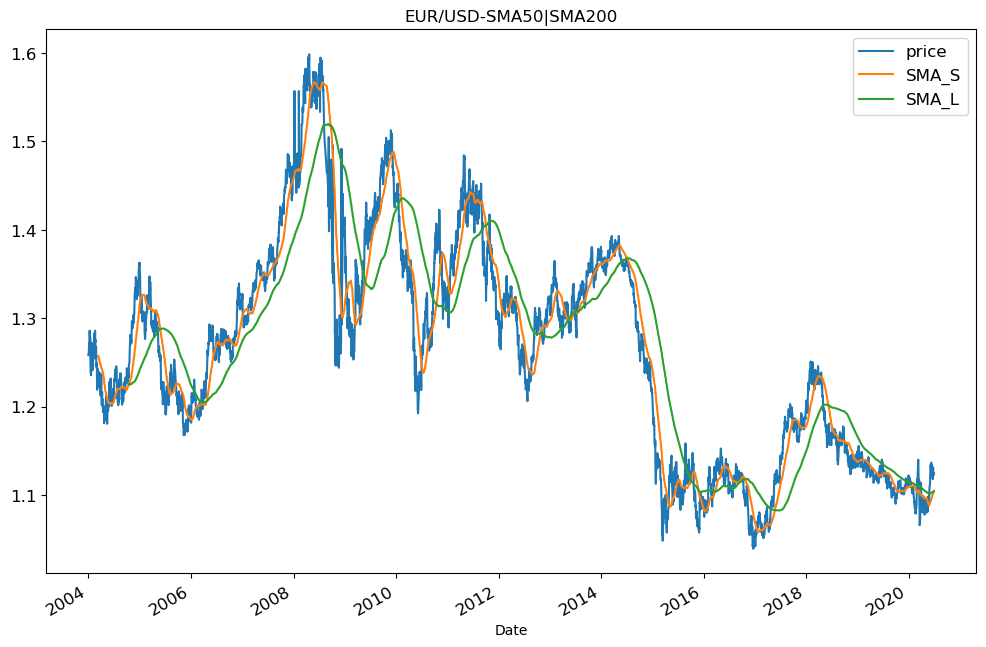

In [9]:
df.plot(figsize=(12,8),title="EUR/USD-SMA{}|SMA{}".format(sma_s,sma_l),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [10]:
df.dropna(inplace=True)

AttributeError: 'Axes' object has no attribute 'format'

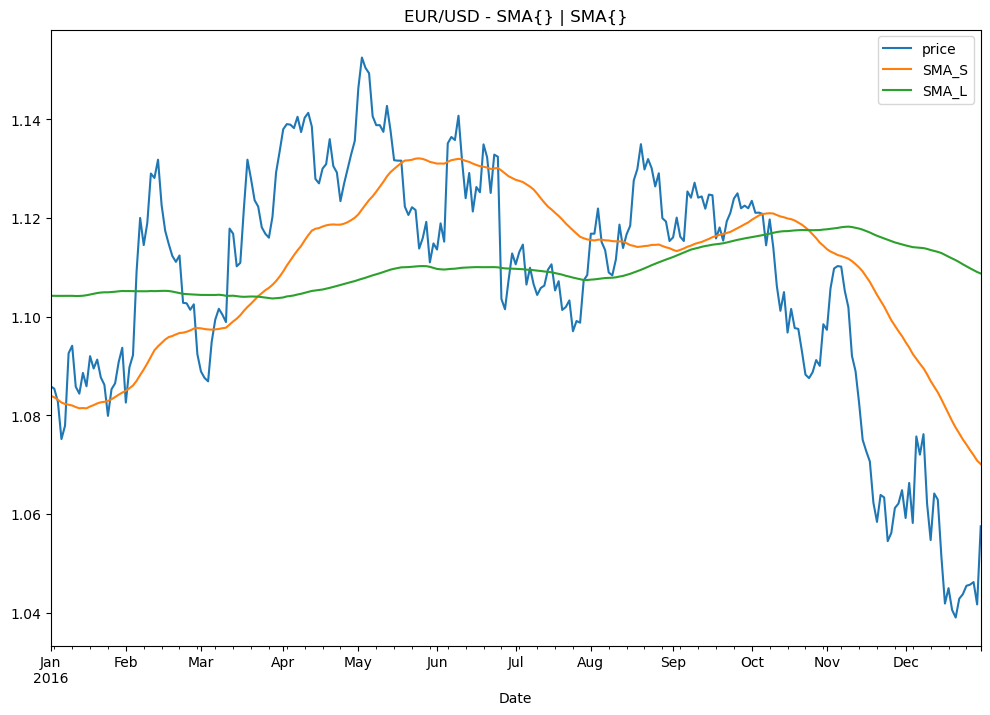

In [11]:
df.loc["2016"].plot(figsize=(12,8),title="EUR/USD - SMA{} | SMA{}").format(sma_s,sma_l)

In [12]:
df["position"]=np.where(df["SMA_S"]>df["SMA_L"],1,-1)

In [13]:
df

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


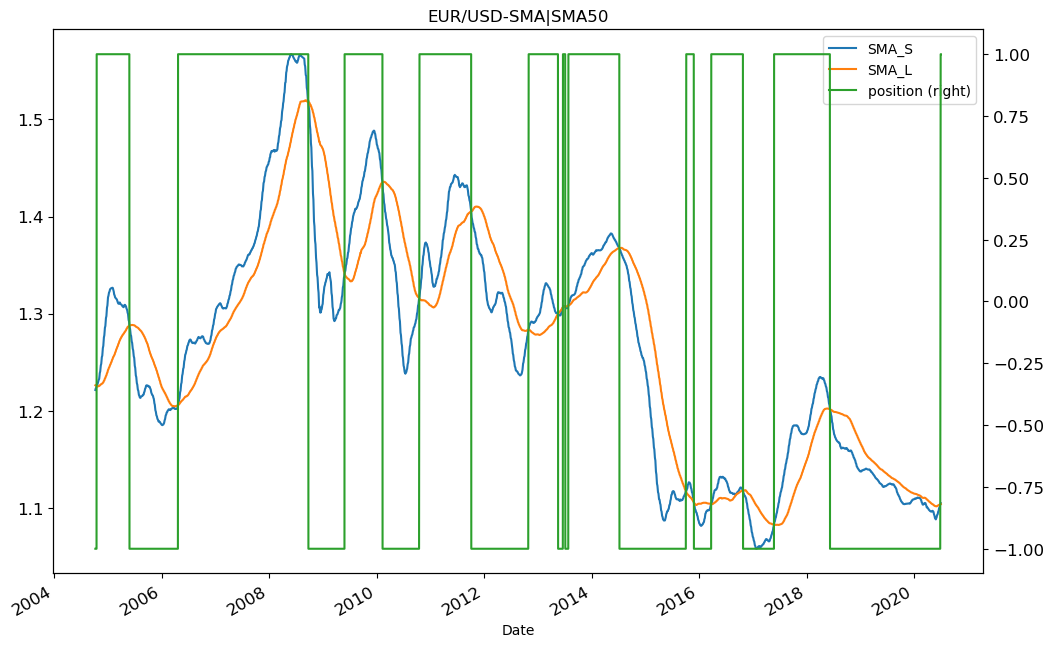

In [14]:
df.loc[:,["SMA_S","SMA_L","position"]].plot(figsize=(12,8),fontsize=12,secondary_y="position",
                                            title="EUR/USD-SMA|SMA{}".format(sma_s,sma_l))
plt.show()

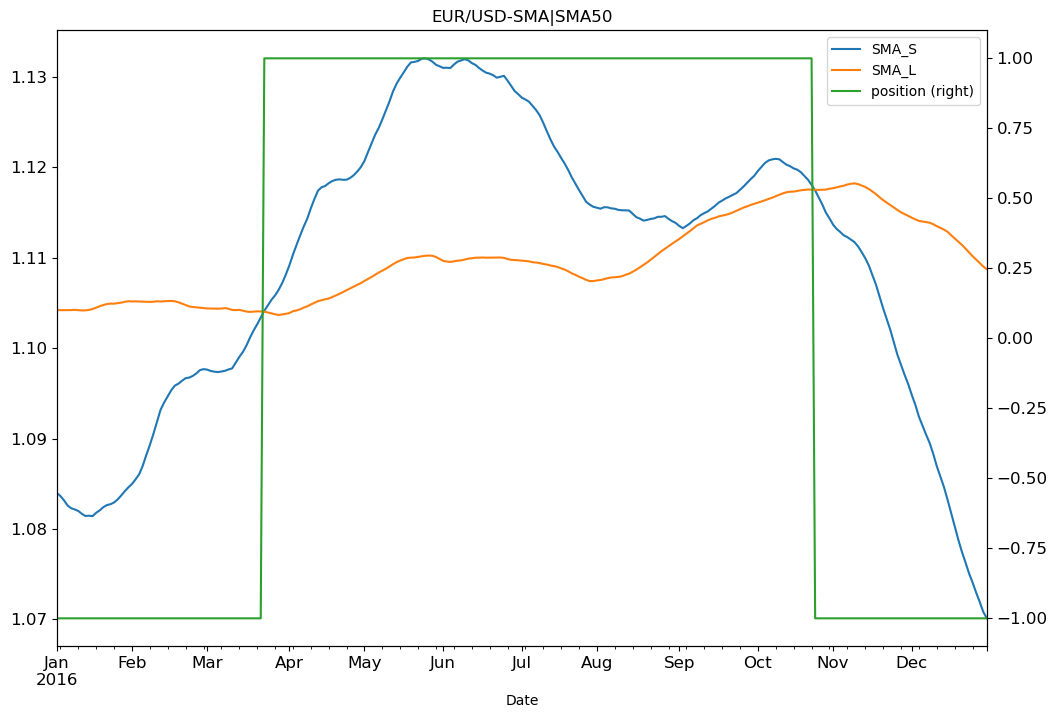

In [15]:
df.loc["2016",["SMA_S","SMA_L","position"]].plot(figsize=(12,8),fontsize=12,secondary_y="position",
                                            title="EUR/USD-SMA|SMA{}".format(sma_s,sma_l))
plt.show()

# Vectorized strategy Backtesting

In [16]:
df

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


In [17]:
df["returns"]=np.log(df.price)/(df.price.shift(1))
df

,price,SMA_S,SMA_L,position,returns
Date,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.168503
2004-10-08,1.241003,1.222628,1.225995,-1,0.175558
2004-10-11,1.238405,1.223352,1.225843,-1,0.172300
2004-10-12,1.232104,1.223888,1.225643,-1,0.168542
...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.109320
2020-06-25,1.125087,1.102486,1.103540,-1,0.104188
2020-06-26,1.122208,1.103213,1.103627,-1,0.102480


In [18]:
df["strategy"]=df.position.shift(1)* df["returns"]
df

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.168503,-0.168503
2004-10-08,1.241003,1.222628,1.225995,-1,0.175558,-0.175558
2004-10-11,1.238405,1.223352,1.225843,-1,0.172300,-0.172300
2004-10-12,1.232104,1.223888,1.225643,-1,0.168542,-0.168542
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.109320,-0.109320
2020-06-25,1.125087,1.102486,1.103540,-1,0.104188,-0.104188
2020-06-26,1.122208,1.103213,1.103627,-1,0.102480,-0.102480


In [19]:
df.dropna(inplace=True)

In [20]:
df[["returns","strategy"]].sum() # absoulte performance

returns     715.752601
strategy    134.603214
dtype: float64

In [21]:
df[["returns","strategy"]].sum().apply(np.exp)

returns              inf
strategy    2.867035e+58
dtype: float64

In [22]:
df[["returns","strategy"]].mean()*252

returns     44.262492
strategy     8.323929
dtype: float64

In [23]:
df[["returns","strategy"]].std()*np.sqrt(252)

returns     0.970042
strategy    2.905572
dtype: float64